## Preface
This is my first class that is exclusivly unsupervised so I am keeping my project relatively small.
In previous classes I had heard of the mushroom dataset for classifications and after using the NMF in the last lesson.

In [135]:
# load libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import NMF
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

import itertools


In [2]:
#load file from dir
filedir=r
file=pd.read_csv(filedir)

In [3]:
file.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## EDA

In [4]:
np.shape(file)

(8124, 23)

In [5]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
#change the typr from object to category so it can be label encoded
df = file.astype('category')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   class                     8124 non-null   category
 1   cap-shape                 8124 non-null   category
 2   cap-surface               8124 non-null   category
 3   cap-color                 8124 non-null   category
 4   bruises                   8124 non-null   category
 5   odor                      8124 non-null   category
 6   gill-attachment           8124 non-null   category
 7   gill-spacing              8124 non-null   category
 8   gill-size                 8124 non-null   category
 9   gill-color                8124 non-null   category
 10  stalk-shape               8124 non-null   category
 11  stalk-root                8124 non-null   category
 12  stalk-surface-above-ring  8124 non-null   category
 13  stalk-surface-below-ring  8124 non-null   catego

In [8]:

le=LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])

In [9]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [10]:
#creating lists of features for display
caps=["cap-shape","cap-surface","cap-color"]
gills=["gill-attachment","gill-spacing","gill-size","gill-color"]
veils=["stalk-shape","stalk-root","stalk-surface-above-ring","stalk-surface-below-ring","stalk-color-above-ring","stalk-color-below-ring "]
verings=["veil-type","veil-color","ring-number","ring-type"]
others=["bruises","odor","spore-print-color","population","habitat"]

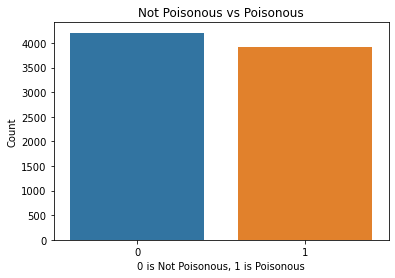

In [11]:
elt_count={}
for elt in df:
    elt_count[elt]=df[elt].value_counts()

sns.barplot(x= elt_count['class'].index, y= elt_count['class'].values)
plt.ylabel('Count')
plt.xlabel('0 is Not Poisonous, 1 is Poisonous')
plt.title('Not Poisonous vs Poisonous')
plt.show()

In [12]:
for col in caps:
    print(elt_count[col])

5    3656
2    3152
3     828
0     452
4      32
1       4
Name: cap-shape, dtype: int64
3    3244
2    2556
0    2320
1       4
Name: cap-surface, dtype: int64
4    2284
3    1840
2    1500
9    1072
8    1040
0     168
5     144
1      44
7      16
6      16
Name: cap-color, dtype: int64


In [13]:
for col in gills:
    print(elt_count[col])

1    7914
0     210
Name: gill-attachment, dtype: int64
0    6812
1    1312
Name: gill-spacing, dtype: int64
0    5612
1    2512
Name: gill-size, dtype: int64
0     1728
7     1492
10    1202
5     1048
2      752
3      732
9      492
4      408
1       96
11      86
6       64
8       24
Name: gill-color, dtype: int64


In [14]:
for col in verings:
    print(elt_count[col])

0    8124
Name: veil-type, dtype: int64
2    7924
1      96
0      96
3       8
Name: veil-color, dtype: int64
1    7488
2     600
0      36
Name: ring-number, dtype: int64
4    3968
0    2776
2    1296
1      48
3      36
Name: ring-type, dtype: int64


In [15]:
for col in others:
    print(elt_count[col])

0    4748
1    3376
Name: bruises, dtype: int64
5    3528
2    2160
7     576
8     576
3     400
0     400
6     256
1     192
4      36
Name: odor, dtype: int64
7    2388
3    1968
2    1872
1    1632
5      72
6      48
8      48
4      48
0      48
Name: spore-print-color, dtype: int64
4    4040
5    1712
3    1248
2     400
0     384
1     340
Name: population, dtype: int64
0    3148
1    2148
4    1144
2     832
5     368
3     292
6     192
Name: habitat, dtype: int64


Class is roughly even and some features seem to follow a normal distrobution. Others like gil attachment are very unbalanced with several or one big item which vastly outnumber the other options.

In [16]:
df.corr()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.298801,-0.154003,-0.146730,NaN,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.032591,-0.031659,-0.030390,NaN,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.107965,0.066050,0.068885,NaN,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.047710,0.002364,0.008057,NaN,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.458983,0.083538,0.092874,NaN,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.061820,0.174532,0.169407,NaN,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.116177,0.099299,0.097160,NaN,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.213775,0.274574,0.253505,NaN,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.010894,0.296548,0.278708,NaN,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.257224,-0.058299,-0.074781,NaN,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


In [17]:
#After seeing the NaN in the correlation plot I drop veil-type
df=df.drop(["veil-type"],axis=1)

In [18]:
cord=df.corr()
cord

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.334593,-0.298801,-0.154003,-0.146730,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.030417,-0.032591,-0.031659,-0.030390,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.089090,0.107965,0.066050,0.068885,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.060837,-0.047710,0.002364,0.008057,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.460824,0.458983,0.083538,0.092874,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.118617,0.061820,0.174532,0.169407,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.088916,-0.116177,0.099299,0.097160,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.212359,-0.213775,0.274574,0.253505,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.056310,0.010894,0.296548,0.278708,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.224287,0.257224,-0.058299,-0.074781,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


<AxesSubplot:>

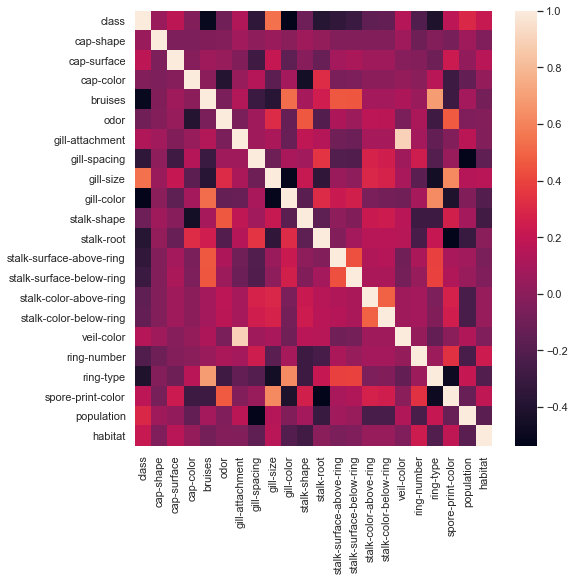

In [19]:
#better
sns.set(rc = {'figure.figsize':(8,8)})
sns.heatmap(cord)

In [20]:
#creating the train test split
y=df[["class"]].copy()
X=df.drop(['class'],axis=1)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3)
np.shape(X_train)

(5686, 21)

In [21]:
nmf=NMF(solver='mu',max_iter=1500,random_state=123)
neighbors=list(range(1,21))

In [22]:
nmf_model=nmf.fit(X_train)
W=nmf_model.transform(X_train)
H=nmf_model.components_

In [23]:
mod1=pd.DataFrame({'id':pd.DataFrame(nmf_model.transform(X_train)).idxmax(axis=1)})
counts=mod1['id'].value_counts()
counts
#now we need to try assigning values to this and test its accuracy

17    1364
18     638
15     635
1      618
9      420
19     407
20     394
13     299
5      263
0      171
2      164
3      128
4      118
10      26
6       13
8       13
11       7
12       6
7        2
Name: id, dtype: int64

<AxesSubplot:>

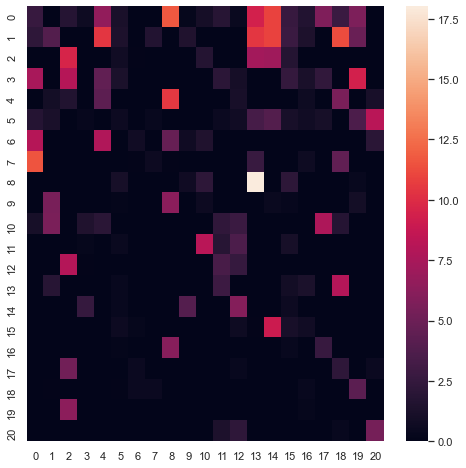

In [49]:
sns.heatmap(H)

In [126]:
#since the distribution of the samples is roughly 1-1 
#I will try and limit the predictions to that ratio
def samples(counts):
    import random

    keyval={}
    len0=0
    len1=0
    for key, val in counts.items():
        if len0 == len1:
            pois=random.choice([0,1])
            if pois == 1:
                len1=val
                keyval[key]=1
            else:
                len0=val
                keyval[key]=0
        elif len0 > len1:
            len1+=val
            keyval[key]=1
        else:
            len0+=val
            keyval[key]=0
    return(keyval)

In [131]:
#create several samples
sample1=samples(counts)
sample2=samples(counts)
sample3=samples(counts)
print(sample1,sample2,sample3)

{17: 1, 18: 0, 15: 0, 1: 0, 9: 1, 19: 1, 20: 0, 13: 1, 5: 0, 0: 1, 2: 0, 3: 1, 4: 0, 10: 1, 6: 1, 8: 1, 11: 0, 12: 0, 7: 1} {17: 0, 18: 1, 15: 1, 1: 1, 9: 0, 19: 0, 20: 1, 13: 0, 5: 1, 0: 0, 2: 1, 3: 0, 4: 1, 10: 0, 6: 0, 8: 0, 11: 1, 12: 1, 7: 0} {17: 1, 18: 0, 15: 0, 1: 0, 9: 1, 19: 1, 20: 0, 13: 1, 5: 0, 0: 1, 2: 0, 3: 1, 4: 0, 10: 1, 6: 1, 8: 1, 11: 0, 12: 0, 7: 1}


In [128]:
#helper function for prediction
def pred(keyval):   
    predicted=[]
    for elt in mod1['id']:
        for key, val in keyval.items():
            if elt==key:
                predicted.append(val)
                #print(val)
            else:
                pass
    return predicted


In [130]:
#get the predictions based on the samples
preds1=pred(sample1)
preds2=pred(sample2)
preds3=pred(sample3)
ylist=y_train['class'].values.tolist()

In [132]:
def evaluate(predicted):
    tp=0
    fp=0
    tn=0
    fn=0
    testlist=zip(ylist,predicted)
    for i,j in testlist:
        if i==1:
            if j == 1:
                tp+=1
            else:
                fn+=1
        elif i==0:
            if j==0:
                tn+=1
            else:
                fp+=1
    precision=(tp/(tp+fp))
    recall=(tp/(tp+fn))
    f1=2*((precision*recall)/(precision+recall))
    accuracy=((tp+tn)/(tp+tn+fp+fn))
    print("The precision is:", precision)
    print("The accuracy is:", accuracy)
    print("The recall is:", recall)
    print("The f1 is:", f1)

In [134]:
print("sample1")
evaluate(preds1)
print("\n sample2")
evaluate(preds2)
print("\n sample3")
evaluate(preds3)

sample1
The precision is: 0.5575096728807598
The accuracy is: 0.5714034470629616
The recall is: 0.5734442836468886
The f1 is: 0.5653647226680935

 sample2
The precision is: 0.41470277875483647
The accuracy is: 0.42859655293703836
The recall is: 0.42655571635311146
The f1 is: 0.42054574638844305

 sample3
The precision is: 0.41470277875483647
The accuracy is: 0.42859655293703836
The recall is: 0.42655571635311146
The f1 is: 0.42054574638844305


From the evaluations we can see this model did pretty poorly, where is is about as good as randomly selecting if the mushroom is poisonous. I am not suprised by this result after working on the model. Granted in my selection of whether a classifier indicated poisonous or not was selected at randomdom based on balance. But beyond that there are conceptual issues with the model I didn't understand at first. Two samples ended up being the same which is explained by my balancing. But beyond that how the data is confounds this method of classification, at least my design of it. The samples are dependent on the train test split so this model may actually be better based on the splitting but that is dubious at best. Some takeaways are"
1) I needed to select fewer classifications rather than the number of predictors. If I was to do this again I would focus on just one aspect I would do just the gils or something else, anything really to get the number down to something like it was in the BBC classifier problem
2) The simple nature of only a couple of possible values per predictor seems to not work well with the NMF. After reading the documentation on the sklearn wiki I was under the impression that the biggest hinderance was zero or null values but that doesn't seem right.
This has been a learning experience and doesn't hamper my interest in matrix modeling.